In [1]:
import numpy as np 
import pandas as pd 
import os
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
df = pd.read_csv('waves_price.csv')
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-09-2019,0.854180,0.867912,0.843578,0.850945,11106574,85094460.0
1,27-09-2019,0.832644,0.857013,0.816849,0.854341,12545777,85434091.0
2,26-09-2019,0.863165,0.912489,0.790631,0.832843,13631359,83284287.0


In [4]:
print (df.describe())

              Open         High          Low        Close        Volume  \
count  1214.000000  1214.000000  1214.000000  1214.000000  1.214000e+03   
mean      2.799189     2.947581     2.636126     2.796365  1.357572e+07   
std       2.724361     2.885105     2.512696     2.717882  1.748107e+07   
min       0.127527     0.151516     0.122684     0.127242  4.912000e+03   
25%       0.458646     0.481521     0.422732     0.457336  3.143422e+05   
50%       2.340000     2.430000     2.245000     2.340000  7.884470e+06   
75%       3.867500     4.097500     3.637500     3.862500  2.024092e+07   
max      16.140000    18.070000    14.540000    16.030000  1.399586e+08   

         Market Cap  
count  1.196000e+03  
mean   2.823364e+08  
std    2.729042e+08  
min    1.272420e+07  
25%    4.322872e+07  
50%    2.368950e+08  
75%    3.903938e+08  
max    1.602660e+09  


In [5]:
print (df.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Market Cap    float64
dtype: object


In [6]:
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,28-09-2019,0.850945
1,27-09-2019,0.854341
2,26-09-2019,0.832843


In [7]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
                Close
Date                 
01-01-2017   0.221322
01-01-2018  12.570000
01-01-2019   3.160000
                Close
Date                 
31-12-2016   0.250915
31-12-2017  12.600000
31-12-2018   3.230000


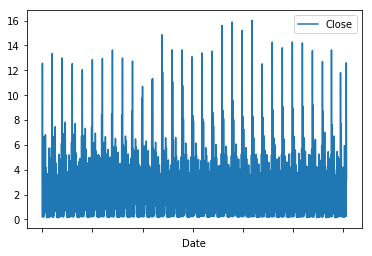

In [8]:
#plot
df_ts.plot()

In [9]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
       
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [10]:
# Stationarity with Dickey Fuller Test 
# Convert the DF to series first
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                -1.352186e+01
p-value                        2.725126e-25
#lags Used                     2.200000e+01
Number of Observations Used    1.191000e+03
Critical Value (1%)           -3.435852e+00
Critical Value (5%)           -2.863970e+00
Critical Value (10%)          -2.568064e+00
dtype: float64
